### Classify Cancer dataset with Decision Tree model

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 2)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('Train data Accuracy: {}'.format(tree.score(X_train,y_train)))
print('Test data Accuracy: {}'.format(tree.score(X_test, y_test)))

Train data Accuracy: 1.0
Test data Accuracy: 0.916083916083916


#### because all the leaf nodes are pure nodes, the train data accuracy is 1. 
- however, without pruning, decision tree model can be easily overfitted.

### Post-pruning 
- **max-depth** restricts the consecutive questions into 4

In [16]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 1) #or min_sample_leaf. it restricts the minimum number of sample in leaf node
tree.fit(X_train, y_train)
print('Train data Accuracy: {}'.format(tree.score(X_train,y_train)))
print('Test data Accuracy: {}'.format(tree.score(X_test, y_test)))

Train data Accuracy: 0.9882629107981221
Test data Accuracy: 0.951048951048951


### Make a tree into Graph
<br> `export_graphviz` function make `.dot` file which is a text file to save graphs.

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['malignan', 'benign'], 
               feature_names = cancer.feature_names, impurity = False, filled=True) #filled makes each nodes into colored nodes


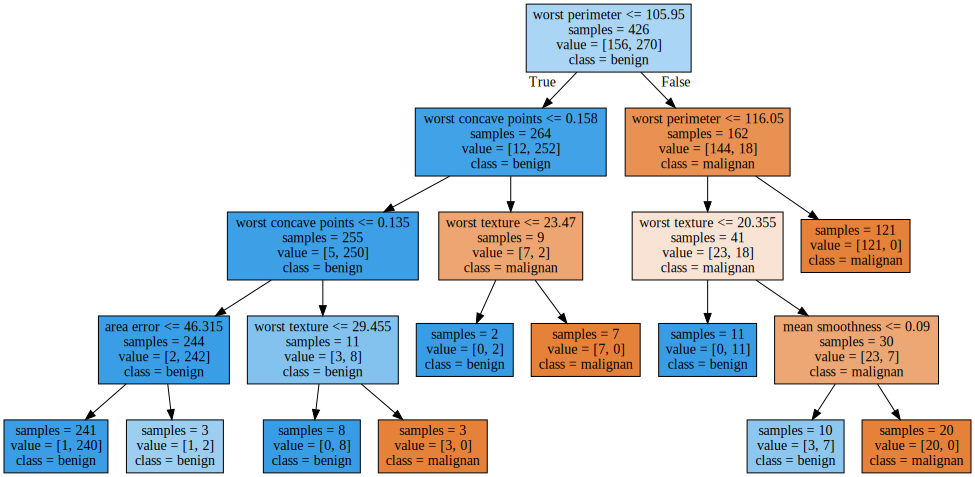

In [12]:
import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [13]:
print('feature importance:\n{}'.format(tree.feature_importances_))

feature importance:
[0.         0.         0.         0.         0.03434593 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00337595 0.         0.         0.         0.
 0.         0.         0.         0.08903589 0.81295916 0.
 0.         0.         0.         0.06028306 0.         0.        ]


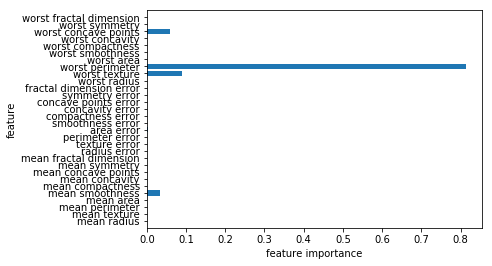

In [14]:
from matplotlib import pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align ='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


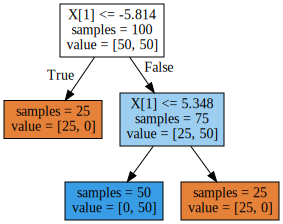

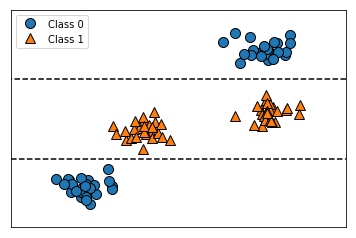

In [15]:
import mglearn
tree =mglearn.plots.plot_tree_not_monotone()
display(tree)

#### Benefits & Withdraws of Decision Tree
|Benefits|Withdraws|
|---:|:---|
|Can easily understood when using plotting<br> Don't need regularization|easily overfitted|


### Ensemble: Random Forest & Gradient Boosting

### Random Forest
- It creates multiply tree models and estimates average of them.
- best way to prevent overfitting

1. Make a **Bootstrap Sample**
<br> Bootstrap Sample example: original data = ['a','b','c','d'], possible bootstrap sample: ['b','b','a','d'] or ['c','a','a','a'] etc.
2. Set Parameters <br> `n_estimator` = num of trees,` max_features` = num of features that would consider

In [23]:
len(cancer.feature_names)

30

In [41]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 3)
forest = RandomForestClassifier(n_estimators = 100, random_state = 5, max_features = 1, n_jobs = 2) #n_jobs is the num of core used
forest.fit(X_train,y_train)

print('Train data Accuracy: {}'.format(forest.score(X_train,y_train)))
print('Test data Accuracy: {}'.format(forest.score(X_test, y_test)))

Train data Accuracy: 1.0
Test data Accuracy: 0.951048951048951


### Unlike using a singular tree model, forest take account of various features

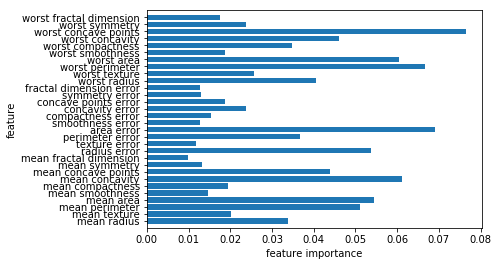

In [31]:
plot_feature_importances_cancer(forest)

### Gradient Boosting Regression Tree

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 70)
gbrt = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print('Train data Accuracy: {}'.format(gbrt.score(X_train,y_train)))
print('Test data Accuracy: {}'.format(gbrt.score(X_test, y_test)))

Train data Accuracy: 0.9953051643192489
Test data Accuracy: 0.958041958041958


### GBRT ignores some features completely

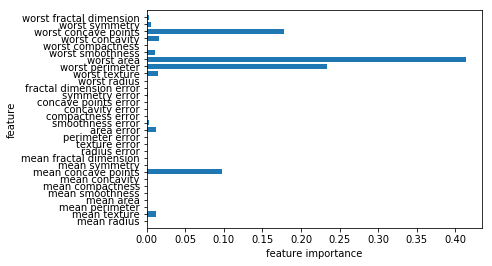

In [50]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)